In [99]:
import argparse
import numpy as np
import sys, os
import torch
import time
import h5py
import torch.nn

#import custom modules
code_dir = '/user_data/mmhender/imStat/code/'
sys.path.append(code_dir)
from utils import nsd_utils, default_paths, texture_utils
from model_fitting import initialize_fitting
from feature_extraction import texture_statistics_gabor
import matplotlib.pyplot as plt


In [100]:
subject=1
# Load and prepare the image set to work with (all images for the current subject, 10,000 ims)
stim_root = default_paths.stim_root
image_data = nsd_utils.get_image_data(subject)  
image_data = nsd_utils.image_uncolorize_fn(image_data)


Loading images for subject 1

image data size: (10000, 3, 227, 227) , dtype: uint8 , value range: 0 255


In [101]:
aperture = 1.0
aperture_rf_range = 1.1
aperture, models = initialize_fitting.get_prf_models(aperture_rf_range=aperture_rf_range)    


most extreme RF positions:
[-0.55 -0.55  0.04]
[0.55       0.55       0.40000001]


In [120]:
angles = np.mod(np.arctan2(models[:,1], models[:,0])*180/np.pi, 360)

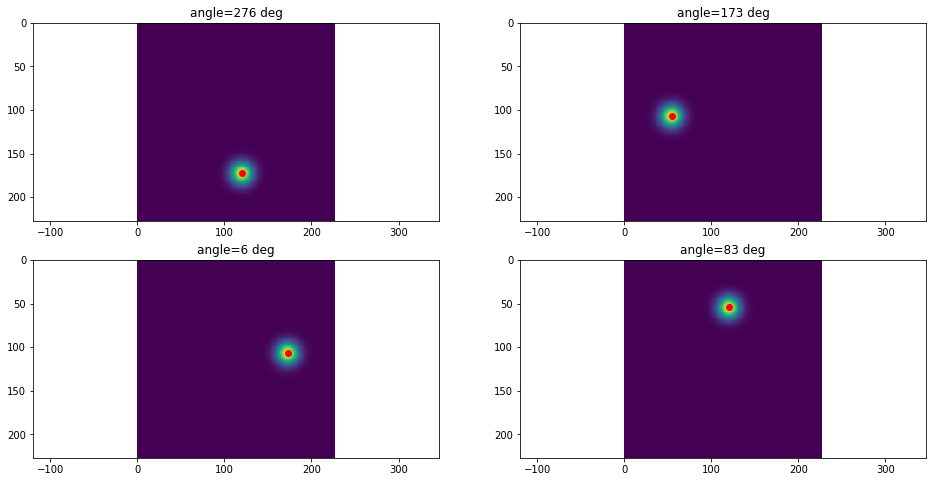

In [121]:
models2plot = [110, 205, 214, 290]
plt.figure(figsize=(16,8));
for mi, mm in enumerate(models2plot):
    x,y,sigma = models[mm]
    n_pix = image_data.shape[2]
    prf = prf_utils.make_gaussian_mass(x, y, sigma, n_pix, size=aperture, \
                          dtype=np.float32)[2]

    plt.subplot(2,2,mi+1)
    plt.pcolormesh(prf)
    plt.axis('equal')
    # plt.axis('off')
    plt.gca().invert_yaxis()
    center = np.array((n_pix/2  - y*n_pix, x*n_pix + n_pix/2))
    plt.scatter(center[1], center[0],color='r')
    plt.title('angle=%d deg'%angles[mm])

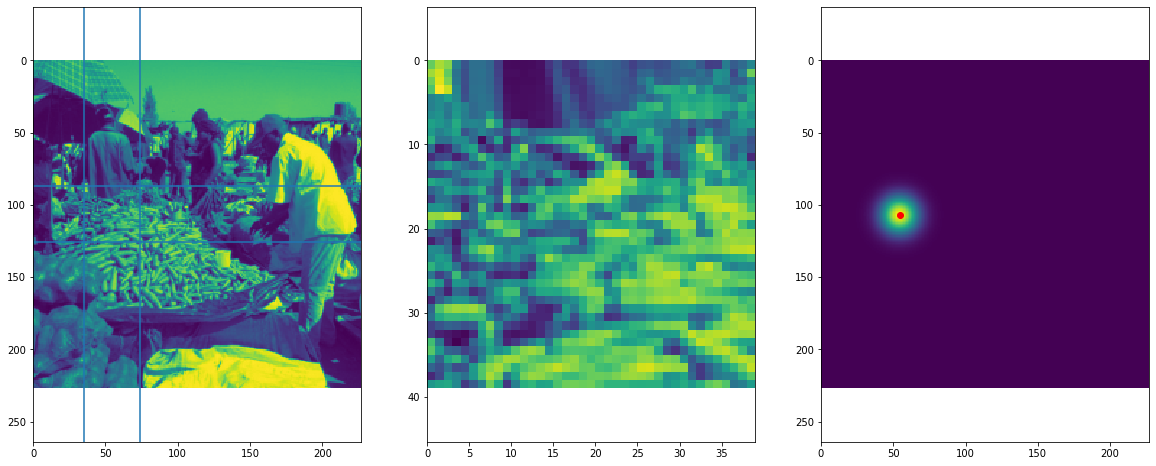

In [116]:
ii=0
mm=205
x,y,sigma = models[mm]
n_pix = image_data.shape[2]
center = np.array((n_pix/2  - y*n_pix, x*n_pix + n_pix/2))
prf = prf_utils.make_gaussian_mass(x, y, sigma, n_pix, size=aperture, \
                          dtype=np.float32)[2]
bbox = texture_utils.get_bbox_from_prf((x,y,sigma), [n_pix, n_pix], n_prf_sd_out=2, min_pix=None, verbose=False, force_square=False)

plt.figure(figsize=(20,8));
plt.subplot(1,3,1)
plt.pcolormesh(image_data[ii,0,:,:])
plt.axis('equal')
# plt.axis('off')
plt.gca().invert_yaxis()
plt.axhline(bbox[0])
plt.axhline(bbox[1])
plt.axvline(bbox[2])
plt.axvline(bbox[3])

plt.subplot(1,3,2)
crop = image_data[ii,0,bbox[0]:bbox[1],bbox[2]:bbox[3]]
plt.pcolormesh(crop)
plt.axis('equal')
# plt.axis('off')
plt.gca().invert_yaxis()

plt.subplot(1,3,3)
plt.pcolormesh(prf)
plt.axis('equal')
# plt.axis('off')
plt.gca().invert_yaxis()
plt.scatter(center[1], center[0],color='r')